# Import librs

In [44]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

# Load dataset

In [3]:
df = pd.read_csv("golf_df.csv")

# EDA

In [4]:
df.head()

,Outlook,Temperature,Humidity,Windy,Hours_played
0,sunny,hot,high,False,25
1,sunny,hot,high,True,30
2,overcast,hot,high,False,46
3,rainy,mild,high,False,45
4,rainy,cool,normal,False,52


In [5]:
df.tail(4)

,Outlook,Temperature,Humidity,Windy,Hours_played
10,sunny,mild,normal,True,48
11,overcast,mild,high,True,52
12,overcast,hot,normal,False,44
13,rainy,mild,high,True,30


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Outlook       14 non-null     object
 1   Temperature   14 non-null     object
 2   Humidity      14 non-null     object
 3   Windy         14 non-null     bool  
 4   Hours_played  14 non-null     int64 
dtypes: bool(1), int64(1), object(3)
memory usage: 590.0+ bytes


In [7]:
df.describe()

,Hours_played
count,14.000000
mean,39.785714
std,9.672949
min,23.000000
25%,31.250000
50%,43.500000
75%,46.000000
max,52.000000


In [8]:
df.describe(include="object")

,Outlook,Temperature,Humidity
count,14,14,14
unique,3,3,2
top,sunny,mild,high
freq,5,6,7


In [10]:
df.isna().sum()

Outlook         0
Temperature     0
Humidity        0
Windy           0
Hours_played    0
dtype: int64

In [13]:
df[df.duplicated()]

,Outlook,Temperature,Humidity,Windy,Hours_played


In [14]:
df.columns

Index(['Outlook', 'Temperature', 'Humidity', 'Windy', 'Hours_played'], dtype='object')

In [20]:
df.index

RangeIndex(start=0, stop=14, step=1)

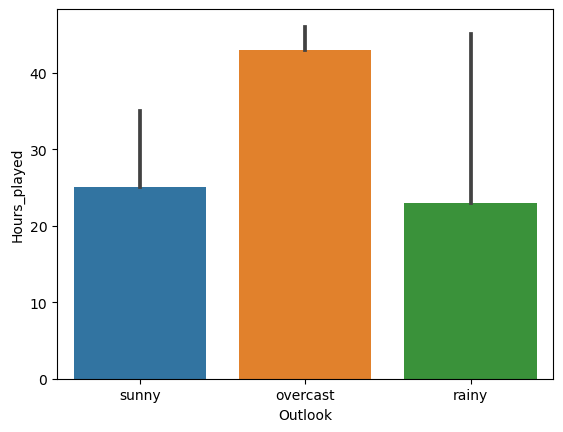

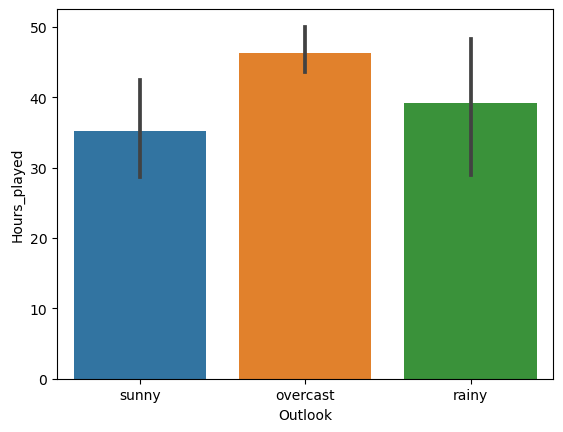

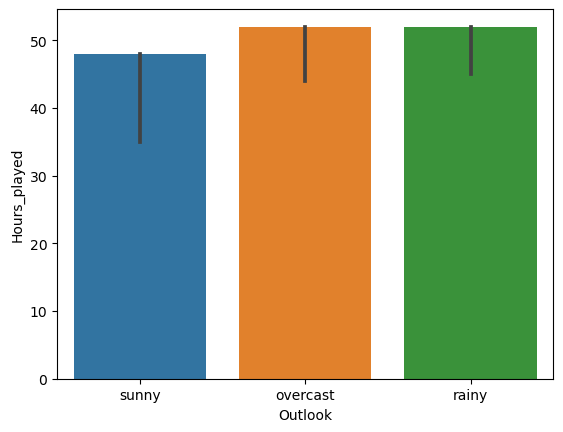

In [21]:
for i in ["min" , "mean" , "max"]:
    sns.barplot(data = df , x = "Outlook" ,  y = "Hours_played" , estimator= i )
    plt.show()

# Data preprocessing 

In [23]:
df.columns

Index(['Outlook', 'Temperature', 'Humidity', 'Windy', 'Hours_played'], dtype='object')

In [22]:
le = LabelEncoder()

In [24]:
df["Outlook"] = le.fit_transform(df["Outlook"])
df["Temperature"] = le.fit_transform(df["Temperature"])
df["Humidity"] = le.fit_transform(df["Humidity"])
df["Windy"] = le.fit_transform(df["Windy"])

In [25]:
df

,Outlook,Temperature,Humidity,Windy,Hours_played
0,2,1,0,0,25
1,2,1,0,1,30
2,0,1,0,0,46
3,1,2,0,0,45
4,1,0,1,0,52
5,1,0,1,1,23
6,0,0,1,1,43
7,2,2,0,0,35
8,2,0,1,0,38
9,1,2,1,0,46


# Split dataset

In [29]:
# x = df.drop("Hours_played" , axis = 1)
x = df.drop(columns=["Hours_played"])
y = df["Hours_played"]

In [30]:
x.shape

(14, 4)

In [31]:
y.shape

(14,)

In [40]:
x_train , x_test , y_train , y_test = train_test_split(x , y ,
                                                       random_state=42 , 
                                                       train_size=.7)

In [41]:
x_train

,Outlook,Temperature,Humidity,Windy
8,2,0,1,0
2,0,1,0,0
1,2,1,0,1
13,1,2,0,1
4,1,0,1,0
7,2,2,0,0
10,2,2,1,1
3,1,2,0,0
6,0,0,1,1


# Load your model

In [42]:
DTR = DecisionTreeRegressor(random_state=42)

In [43]:
grid_prams = {
    "max_depth":[3 , 5 , 10],
    "min_samples_split":[2 , 3 , 5],
    "max_features": [3 , 4]
}

In [50]:
grid_search = GridSearchCV(estimator=DTR , cv= 5 , 
                           scoring="neg_mean_squared_error",
                           param_grid = grid_prams , n_jobs=-1 )

In [51]:
grid_search.fit(x_train ,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10], 'max_features': [3, 4],
                         'min_samples_split': [2, 3, 5]},
             scoring='neg_mean_squared_error')

In [52]:
grid_search.best_params_

{'max_depth': 3, 'max_features': 3, 'min_samples_split': 5}

In [57]:
gt = grid_search.best_estimator_
gt

DecisionTreeRegressor(max_depth=3, max_features=3, min_samples_split=5,
                      random_state=42)

In [56]:
y_pred = gt.predict(x_test)